In [1]:
import pandas as pd
%pylab inline
import cartopy.crs as ccrs

Populating the interactive namespace from numpy and matplotlib


In [37]:
epa_so2_path = '/lcrc/group/earthscience/rjackson/epa_aq/co/hourly_42101_2010.csv'
df = pd.read_csv(epa_so2_path, parse_dates=[[11, 12]], index_col=["State Code", "Date GMT_Time GMT"])
df

/home/rjackson/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/rjackson/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


County Code  Site Num  Parameter Code  POC  \
State Code Date GMT_Time GMT                                                 
1          2010-01-01 06:00:00           73        28           42101    1   
           2010-01-01 07:00:00           73        28           42101    1   
           2010-01-01 08:00:00           73        28           42101    1   
           2010-01-01 09:00:00           73        28           42101    1   
           2010-01-01 10:00:00           73        28           42101    1   
...                                     ...       ...             ...  ...   
80         2011-01-01 02:00:00            6         7           42101    1   
           2011-01-01 03:00:00            6         7           42101    1   
           2011-01-01 04:00:00            6         7           42101    1   
           2011-01-01 05:00:00            6         7           42101    1   
           2011-01-01 06:00:00            6         7           42101    1   

                                 Latitude   Longitude  Datum   Parameter Name  \
State Code Date GMT_Time GMT                                                    
1          2010-01-01 06:00:00  33.529444  -86.850278  WGS84  Carbon monoxide   
           2010-01-01 07:00:00  33.529444  -86.850278  WGS84  Carbon monoxide   
           2010-01-01 08:00:00  33.529444  -86.850278  WGS84  Carbon monoxide   
           2010-01-01 09:00:00  33.529444  -86.850278  WGS84  Carbon monoxide   
           2010-01-01 10:00:00  33.529444  -86.850278  WGS84  Carbon monoxide   
...                                   ...         ...    ...              ...   
80         2011-01-01 02:00:00  31.712200 -106.395300  WGS84  Carbon monoxide   
           2011-01-01 03:00:00  31.712200 -106.395300  WGS84  Carbon monoxide   
           2011-01-01 04:00:00  31.712200 -106.395300  WGS84  Carbon monoxide   
           2011-01-01 05:00:00  31.712200 -106.395300  WGS84  Carbon monoxide   
           2011-01-01 06:00:00  31.712200 -106.395300  WGS84  Carbon monoxide   

                                Date Local Time Local  ...   Units of Measure  \
State Code Date GMT_Time GMT                           ...                      
1          2010-01-01 06:00:00  2010-01-01      00:00  ...  Parts per million   
           2010-01-01 07:00:00  2010-01-01      01:00  ...  Parts per million   
           2010-01-01 08:00:00  2010-01-01      02:00  ...  Parts per million   
           2010-01-01 09:00:00  2010-01-01      03:00  ...  Parts per million   
           2010-01-01 10:00:00  2010-01-01      04:00  ...  Parts per million   
...                                    ...        ...  ...                ...   
80         2011-01-01 02:00:00  2010-12-31      19:00  ...  Parts per million   
           2011-01-01 03:00:00  2010-12-31      20:00  ...  Parts per million   
           2011-01-01 04:00:00  2010-12-31      21:00  ...  Parts per million   
           2011-01-01 05:00:00  2010-12-31      22:00  ...  Parts per million   
           2011-01-01 06:00:00  2010-12-31      23:00  ...  Parts per million   

                                MDL  Uncertainty  Qualifier Method Type  \
State Code Date GMT_Time GMT                                              
1          2010-01-01 06:00:00  0.5          NaN        NaN         FRM   
           2010-01-01 07:00:00  0.5          NaN        NaN         FRM   
           2010-01-01 08:00:00  0.5          NaN        NaN         FRM   
           2010-01-01 09:00:00  0.5          NaN        NaN         FRM   
           2010-01-01 10:00:00  0.5          NaN        NaN         FRM   
...                             ...          ...        ...         ...   
80         2011-01-01 02:00:00  0.5          NaN        NaN         FRM   
           2011-01-01 03:00:00  0.5          NaN        NaN         FRM   
           2011-01-01 04:00:00  0.5          NaN        NaN         FRM   
           2011-01-01 05:00:00  0.5          NaN        NaN         FRM   
         

In [20]:
state_and_county_codes = pd.read_csv('/lcrc/group/earthscience/rjackson/epa_aq/states_and_counties.csv', 
                                    index_col=["State Name", "County Name"])
state_and_county_codes

State Code State Abbreviation  County Code  \
State Name        County Name                                                
Alabama           Autauga               01                 AL            1   
                  Baldwin               01                 AL            3   
                  Barbour               01                 AL            5   
                  Bibb                  01                 AL            7   
                  Blount                01                 AL            9   
...                                    ...                ...          ...   
Country Of Mexico YUCATAN               80                 MX           31   
                  ZACATECAS             80                 MX           32   
Canada            New Brunswick         CC                 CC            4   
                  Ontario               CC                 CC            8   
                  Saskatchewan          CC                 CC           11   

                                 EPA Region  
State Name        County Name                
Alabama           Autauga                 4  
                  Baldwin                 4  
                  Barbour                 4  
                  Bibb                    4  
                  Blount                  4  
...                                     ...  
Country Of Mexico YUCATAN                25  
                  ZACATECAS              25  
Canada            New Brunswick          25  
                  Ontario                25  
                  Saskatchewan           25  

[3281 rows x 4 columns]

In [9]:
df_texas.index

MultiIndex([(48,  29, '2010-04-01 19:00:00'),
            (48,  29, '2010-04-01 20:00:00'),
            (48,  29, '2010-04-01 21:00:00'),
            (48,  29, '2010-04-01 22:00:00'),
            (48,  29, '2010-04-01 23:00:00'),
            (48,  29, '2010-04-02 00:00:00'),
            (48,  29, '2010-04-02 01:00:00'),
            (48,  29, '2010-04-02 02:00:00'),
            (48,  29, '2010-04-02 03:00:00'),
            (48,  29, '2010-04-02 04:00:00'),
            ...
            (48, 479, '2010-09-28 02:00:00'),
            (48, 479, '2010-09-28 03:00:00'),
            (48, 479, '2010-09-28 04:00:00'),
            (48, 479, '2010-09-28 05:00:00'),
            (48, 479, '2010-09-28 06:00:00'),
            (48, 479, '2010-09-28 07:00:00'),
            (48, 479, '2010-09-28 08:00:00'),
            (48, 479, '2010-09-28 09:00:00'),
            (48, 479, '2010-09-28 10:00:00'),
            (48, 479, '2010-09-28 11:00:00')],
           names=['State Code', 'County Code', 'Date GMT_Time G

In [38]:
df_texas = df.loc[48, :,:]

In [25]:
counties = ["Austin", "Brazoria", "Chambers", "Fort Bend", "Galveston", "Harris", "Liberty", "Montgomery", "Waller"]

In [32]:
state_and_county_codes.loc["Texas"]["County Code"]

County Name
Anderson      1
Andrews       3
Angelina      5
Aransas       7
Archer        9
           ... 
Wood        499
Yoakum      501
Young       503
Zapata      505
Zavala      507
Name: County Code, Length: 254, dtype: int64

15 not found
39 not found
71 not found
157 not found
167 not found
201 not found
291 not found
339 not found
473 not found


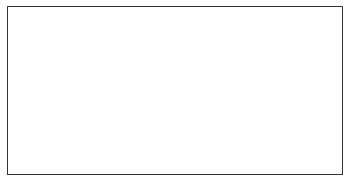

In [36]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
for co in counties:
    c = int(state_and_county_codes.loc["Texas", co]["County Code"])
    try:
        df_county = df_texas.loc[48, c]
        ax.plot(df_county.iloc[0].longtiude, df_county.iloc[0].latitiude)
    except:
        print(str(c) + " not found")

In [39]:
df_texas.loc[48]

,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
Date GMT_Time GMT,,,,,,,,,,,,,,,,,,,,,
2010-04-01 19:00:00,29,46,42101,1,29.426944,-98.486389,WGS84,Carbon monoxide,2010-04-01,13:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Bexar,2010-06-09
2010-04-01 20:00:00,29,46,42101,1,29.426944,-98.486389,WGS84,Carbon monoxide,2010-04-01,14:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Bexar,2010-06-09
2010-04-01 21:00:00,29,46,42101,1,29.426944,-98.486389,WGS84,Carbon monoxide,2010-04-01,15:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Bexar,2010-06-09
2010-04-01 22:00:00,29,46,42101,1,29.426944,-98.486389,WGS84,Carbon monoxide,2010-04-01,16:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Bexar,2010-06-09
2010-04-01 23:00:00,29,46,42101,1,29.426944,-98.486389,WGS84,Carbon monoxide,2010-04-01,17:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Bexar,2010-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-09-28 07:00:00,479,17,42101,1,27.501826,-99.502984,WGS84,Carbon monoxide,2010-09-28,01:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Webb,2013-06-04
2010-09-28 08:00:00,479,17,42101,1,27.501826,-99.502984,WGS84,Carbon monoxide,2010-09-28,02:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Webb,2013-06-04
2010-09-28 09:00:00,479,17,42101,1,27.501826,-99.502984,WGS84,Carbon monoxide,2010-09-28,03:00,...,Parts per million,0.5,NaN,NaN,FRM,93,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Texas,Webb,2013-06-04
